In [1]:
from process1 import SingleImage
from process2 import MultipleImages
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian
%matplotlib qt

In [2]:
process = MultipleImages()

In [3]:
#Can be given path as a string
process.add_folder()

In [4]:
#Images with pixelsize above threshold will be excluded, unless findsize is False
#If findsize is false the class should not attempt to find a textfile
#Later parts of the program will break unless the user manually sets the pixelsize
#before detection

process.get_info(threshold=2.5,
                 findsize=True)

In [5]:
#This is how to overwrite pixelsize manually

#for image in process.images:
#    image.image["pixelsize"] = 1

In [6]:
#process.make_compact(folder="temp_data")

In [7]:
#bar_size is the height of the info bar at the bottom of the image

process.get_data(bar_size=128)

In [8]:
#Each image will be filtered with function and arguments during the process

initialfilter = {
    "func":gaussian,
    "sigma":4,
    "preserve_range":True
}

In [9]:
#For splitting the images, set to None if you want to skip it

split_args = {
    "filter":(lambda image : gaussian(image, 20, preserve_range=True)),
    "masks":None,
    "background":"mean",
    "interact":True
}

In [10]:
#For removing objects and bright areas from images

blur_args = {
    "filter":(lambda image : gaussian(image, 20, preserve_range=True)),
    "background":"mean",
    "interact":True
}

In [11]:
#For increasing the contrast between particles and background

cap_args = {
    "minval":0,
    "maxval":255,
    "interact":True
}

In [12]:
#Anything above upper will be considered particles, anything below
#lower will be considered background

markers_args = {
    "upper":240,
    "lower":140
}


In [13]:
#The higher erosions and dilations, the more uniform the shapes will be

segment_args = {
    "erosions":2,
    "dilations":2
}

In [14]:
#Any objects with less pixels than size will be removed
#Circularity goes from 0(all objects) to 1(perfect circles)

filter_args = {
    "size":2,
    "circularity":0.5
}

In [15]:
#You can replace "data" with "current" to see the processed image
#instead of the original

show_args = {
    "im":"data",
    "blocking":True
}


In [16]:
%matplotlib qt

process.process_singles(filter=initialfilter,
                        split_args=split_args,
                        blur_args=blur_args,
                        cap_args=cap_args,
                        markers_args=markers_args,
                        segment_args = segment_args,
                        filter_args = filter_args,
                        show_args=show_args)

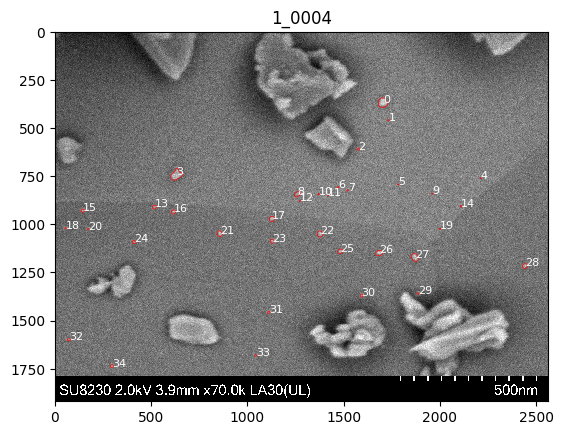

In [17]:
%matplotlib inline

process.show_particles(im="data")

Particle density = 1.519E+01 #/µm^2
Particle area = 0.2710%


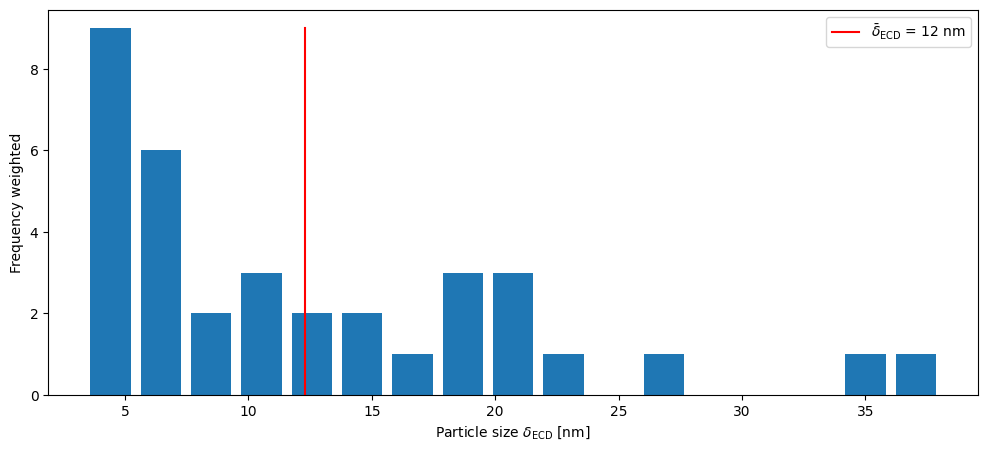

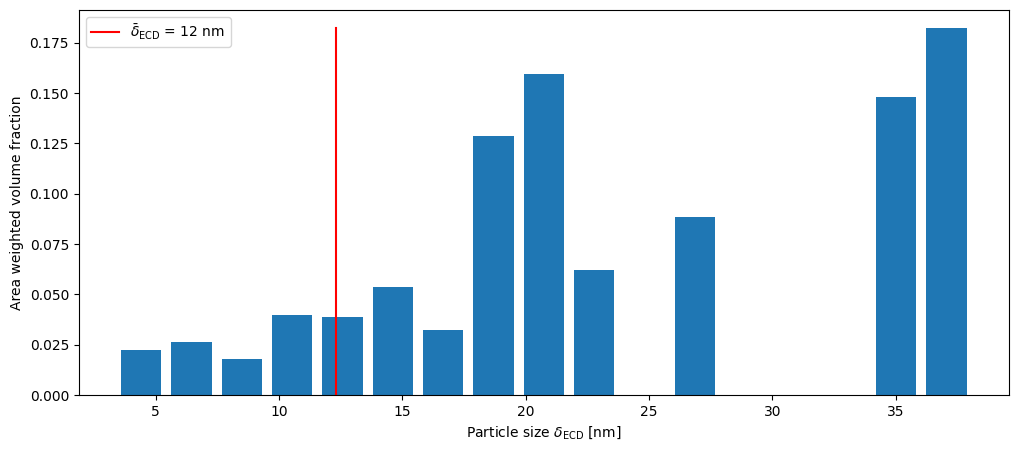

In [18]:
%matplotlib inline

process.overall_stats(bin_width=2)

In [19]:
#process.unmake_compact()

In [20]:
process.save_current("notebook_test.pkl")
process.save_stats_dict("notebook_test_dict.pkl")